
1) Read Emission files
2) Read ISRM matrices
3) Get emission concentrations,health and economic impacts


In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import time
import numpy as np
import zarr
import s3fs
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.patches import FancyArrowPatch
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from PIL import Image
import io
import numpy as np
from contextily.tile import _fetch_tile
from matplotlib.colors import LinearSegmentedColormap
import pyreadr

proj_string = "+proj=lcc +lat_0=40 +lon_0=-97 +lat_1=33 +lat_2=45 +x_0=0 +y_0=0 +ellps=sphere +units=m +no_defs +type=crs"

emis_shapefile_filepath = '../BEAM_to_EMFACT/isrm_polygon/isrm_polygon.shp'

emissionType = 'All' #['onNetwork','offNetwork','All']


scenarios = [

#              'sfbay-baseline3_20240728',
#              'sfbay-baseline3_20240728',
             
#              'sfbay-tr_capacity_1_5-20230608',
#              'sfbay-tr_capacity_1_5-20230608',
#              'sfbay-tr_capacity_1_5-20230608',
             
#              'sfbay-telecommuting-baseline-20230616',
    
#                  'sfbay-emissions--20240123--2018-Baseline__2025-04-10_03-11-41_sjh'
#     'HaitamTest_isrm_emissions_by_pollutant.csv' #is_local_emis_file = True

    
                 'sfbay-emissions--20240123--2018-Baseline__2025-04-13_21-05-01_iek'
#     'HaitamTest_isrm_emissions_by_pollutant.csv' #is_local_emis_file = True

            ]
scenarios2 = [
#         'sfbay-cordon_flatrate_20241023',
#         'sfbay-cordon_income_20241023',
    
#         'sfbay-tr_capacity_1_5-20230608',
#         'sfbay-wb-incentives-200-20230630',
#         'sfbay-tr-discount-100-20230703',
    
#         'sfbay-telecommuting-8p60-20230620',
    
#     'sfbay-emissions--20240123--2018-Baseline__2025-04-10_03-11-41_sjh'
#     'HaitamTest_isrm_emissions_by_pollutant.csv' #is_local_emis_file = True

    'sfbay-emissions--20240123--2018-Baseline__2025-04-13_21-05-01_iek'
#     'HaitamTest_isrm_emissions_by_pollutant.csv' #is_local_emis_file = True

             ]

modes = 'freight' #['car', 'UBUS', 'freight', 'all']

scenario_labels = [
#     'SFMTA Cordon Policy Flat Rate', 
#     'SFMTA Cordon Policy Income-Based', 
    
#     'Baseline',
#     'Active Modes Incentives',
#     'Transit Incentives',

#     'Telecommuting'
    
#     'TestHaitam04102025_CRI'
#     'TestHaitam04102025_BEAM'

    
    'TestHaitam04132025_CRI'
#     'TestHaitam04132025_BEAM'
]
    

bucket = 'beam-core-outputs'

#Primary PM2.5 to BC1 and BC3
is_BC = False
#Nox to NO2
is_NO2 = False
#
is_local_emis_file = False

# Custom colormap with white at the center
def custom_colormap():
    colors = ["#0000ff", "#ffffff", "#ff0000"]
    n_bins = 100  # Discretizes the interpolation into bins
    cmap_name = 'custom_cmap'
    return LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

def custom_colormap2():
    colors = ["#ff0000", "#ffffff", "#0000ff"]
    n_bins = 100  # Discretizes the interpolation into bins
    cmap_name = 'custom_cmap'
    return LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

####SCENARIO#####
####sfbay-emissions--20240123--2018-Baseline__2025-04-13_21-05-01_iek#####
####sfbay-emissions--20240123--2018-Baseline__2025-04-13_21-05-01_iek#####
load_emis_data ...
tons_per_year_ROG 13167.978948139766
tons_per_year_NOx 24279.717167464172
tons_per_year_NH3 1973.869247991976
tons_per_year_SOx 217.03450176526104
tons_per_year_PM2_5 652.0724779870633
tons_per_year_CO2 21756755.82965597
load_shape_data ...
merge_emis_with_shape ...
load_inmap_data ...
process_emission_data ...
['AOrgPartitioning', 'Asian', 'Baseline NH3', 'Baseline NOx', 'Baseline SOA', 'Baseline SOx', 'Baseline TotalPM25', 'Baseline VOC', 'Baseline pNH4', 'Baseline pNO3', 'Baseline pSO4', 'Black', 'Dx', 'Dy', 'Dz', 'E', 'Kxxyy', 'Kzz', 'Latino', 'LayerHeight', 'M2d', 'M2u', 'MortalityRate', 'N', 'NH3 emissions', 'NH3DryDep', 'NHPartitioning', 'NOPartitioning', 'NOx emissions', 'NOxDryDep', 'Native', 'OtherGasWetDep', 'PM2.5 emissions', 'ParticleDryDep', 'ParticleWetDep', 'PrimaryPM25', 'S', 'S1', 'SC

  Model  Krewski Deaths  LePeule Deaths
0  ISRM       54.449985      122.532467
  Model  Krewski Damages  LePeule Damages
0  ISRM     4.900499e+08     1.102792e+09


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_92166/3266980503.py:468: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  resultsISRM.to_file(f'{scenario2}_{scenario}_{modes}_{emissionType}_resultsISRM.shp')


plot_emis ...


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_92166/3266980503.py:355: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  emis.to_file(f'{scenario2}_{scenario}_{emissionType}_{modes}_delta_emis.shp')


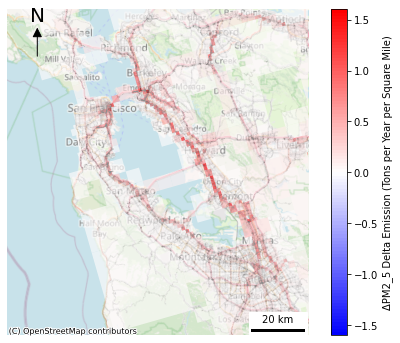

plot_emis ...


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_92166/3266980503.py:355: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  emis.to_file(f'{scenario2}_{scenario}_{emissionType}_{modes}_delta_emis.shp')


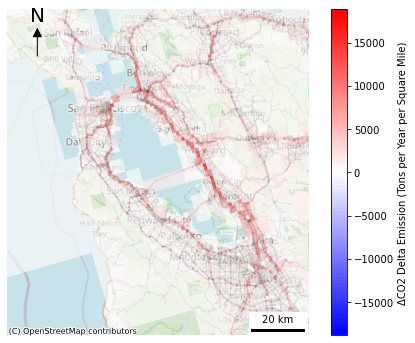

plot_concentrations ...


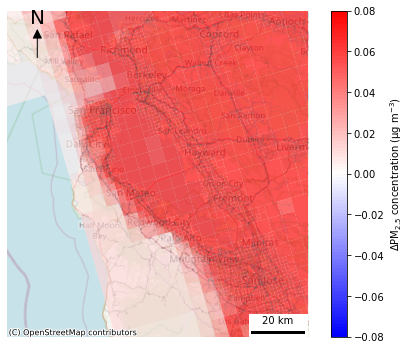

plot_emis ...


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_92166/3266980503.py:355: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  emis.to_file(f'{scenario2}_{scenario}_{emissionType}_{modes}_delta_emis.shp')


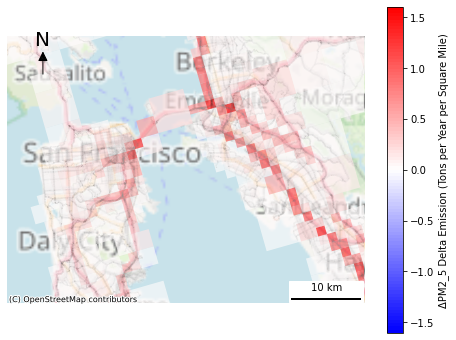

plot_emis ...


/var/folders/h9/g8d27p9s5js3dx9z7b5y8k5c0000gr/T/ipykernel_92166/3266980503.py:355: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  emis.to_file(f'{scenario2}_{scenario}_{emissionType}_{modes}_delta_emis.shp')


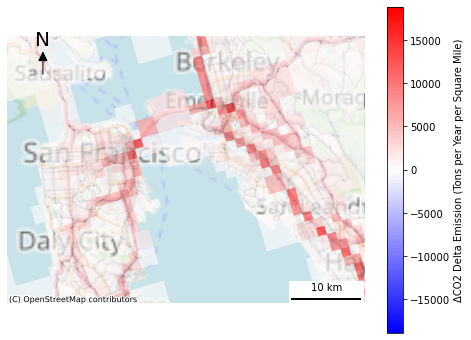

plot_concentrations ...


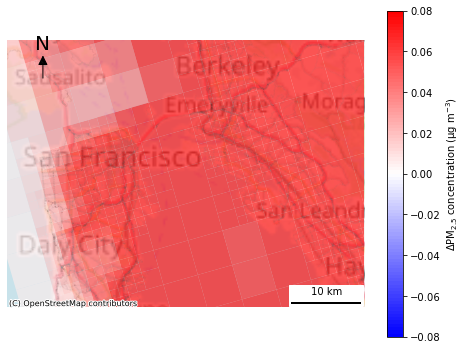

In [2]:


def load_emis_data(emis_filepath, emis_filepath2=None):
    print('load_emis_data ...')
    emis = pd.read_csv(emis_filepath, nrows=None)
    
    print('tons_per_year_ROG', emis.tons_per_year_ROG.sum())
    print('tons_per_year_NOx', emis.tons_per_year_NOx.sum())
    print('tons_per_year_NH3', emis.tons_per_year_NH3.sum())
    print('tons_per_year_SOx', emis.tons_per_year_SOx.sum())
    print('tons_per_year_PM2_5', emis.tons_per_year_PM2_5.sum())
    print('tons_per_year_CO2', emis.tons_per_year_CO2.sum())
    
    if modes == 'car':
        emis = emis[emis['mode']=='car']
    elif modes == 'freight':
        emis = emis[emis['mode']=='freight']
    elif modes == 'UBUS':
        emis = emis[emis['mode']=='UBUS']

    if emissionType == 'onNetwork':

        emis['tons_per_year_ROG'] = emis['tons_per_year_RUNEX_ROG'] + emis['tons_per_year_RUNLOSS_ROG']  
        emis['tons_per_year_NOx'] = emis['tons_per_year_RUNEX_NOx'] 
        emis['tons_per_year_NH3'] = emis['tons_per_year_RUNEX_NH3']
        emis['tons_per_year_SOx'] = emis['tons_per_year_RUNEX_SOx'] 
        emis['tons_per_year_PM2_5'] = emis['tons_per_year_RUNEX_PM2_5'] + emis['tons_per_year_PMBW_PM2_5'] + emis['tons_per_year_PMTW_PM2_5'] 
        emis['tons_per_year_CO2'] = emis['tons_per_year_RUNEX_CO2']

    elif emissionType == 'offNetwork':

        emis['tons_per_year_ROG'] =  emis['tons_per_year_DIURN_ROG'] + emis['tons_per_year_HOTSOAK_ROG'] + emis['tons_per_year_STREX_ROG']  
        emis['tons_per_year_NOx'] = emis['tons_per_year_STREX_NOx'] 
        emis['tons_per_year_NH3'] = 0.0
        emis['tons_per_year_SOx'] = emis['tons_per_year_STREX_SOx'] 
        emis['tons_per_year_PM2_5'] = emis['tons_per_year_STREX_PM2_5']
        emis['tons_per_year_CO2'] = emis['tons_per_year_STREX_CO2']

    
    emis = emis[['ISRM', 'tons_per_year_ROG', 'tons_per_year_NOx', 'tons_per_year_NH3', 'tons_per_year_SOx', 'tons_per_year_PM2_5', 'tons_per_year_CO2']]
    emis = emis.groupby('ISRM').sum().reset_index()

    if emis_filepath2 != emis_filepath:
        
        emis2 = pd.read_csv(emis_filepath2, nrows=None)
        
        if modes == 'car':
            emis2 = emis2[emis2['mode']=='car']
        elif modes == 'freight':
            emis2 = emis2[emis2['mode']=='freight']
        elif modes == 'UBUS':
            emis2 = emis2[emis2['mode']=='UBUS']
        
        if emissionType == 'onNetwork':
            
            emis2['tons_per_year_ROG'] = emis2['tons_per_year_RUNEX_ROG'] + emis2['tons_per_year_RUNLOSS_ROG']  
            emis2['tons_per_year_NOx'] = emis2['tons_per_year_RUNEX_NOx'] 
            emis2['tons_per_year_NH3'] = emis2['tons_per_year_RUNEX_NH3']
            emis2['tons_per_year_SOx'] = emis2['tons_per_year_RUNEX_SOx'] 
            emis2['tons_per_year_PM2_5'] = emis2['tons_per_year_RUNEX_PM2_5'] + emis2['tons_per_year_PMBW_PM2_5'] + emis2['tons_per_year_PMTW_PM2_5'] 
            emis2['tons_per_year_CO2'] = emis2['tons_per_year_RUNEX_CO2']

        elif emissionType == 'offNetwork':

            emis2['tons_per_year_ROG'] =  emis2['tons_per_year_DIURN_ROG'] + emis2['tons_per_year_HOTSOAK_ROG'] + emis2['tons_per_year_STREX_ROG']  
            emis2['tons_per_year_NOx'] = emis2['tons_per_year_STREX_NOx'] 
            emis2['tons_per_year_NH3'] = 0.0
            emis2['tons_per_year_SOx'] = emis2['tons_per_year_STREX_SOx'] 
            emis2['tons_per_year_PM2_5'] = emis2['tons_per_year_STREX_PM2_5']
            emis2['tons_per_year_CO2'] = emis2['tons_per_year_STREX_CO2']

        emis2 = emis2[['ISRM', 'tons_per_year_ROG', 'tons_per_year_NOx', 'tons_per_year_NH3', 'tons_per_year_SOx', 'tons_per_year_PM2_5', 'tons_per_year_CO2']]
        emis2 = emis2.groupby('ISRM').sum().reset_index()
        merged_emis = pd.merge(emis, emis2, on='ISRM', how='outer', suffixes=('_1', '_2')).fillna(0)
        merged_emis['tons_per_year_ROG'] = (merged_emis['tons_per_year_ROG_2'] - merged_emis['tons_per_year_ROG_1'])
        merged_emis['tons_per_year_NOx'] = (merged_emis['tons_per_year_NOx_2'] - merged_emis['tons_per_year_NOx_1'])
        merged_emis['tons_per_year_NH3'] = (merged_emis['tons_per_year_NH3_2'] - merged_emis['tons_per_year_NH3_1'])
        merged_emis['tons_per_year_SOx'] = (merged_emis['tons_per_year_SOx_2'] - merged_emis['tons_per_year_SOx_1'])
        merged_emis['tons_per_year_PM2_5'] = (merged_emis['tons_per_year_PM2_5_2'] - merged_emis['tons_per_year_PM2_5_1'])
        merged_emis['tons_per_year_CO2'] = (merged_emis['tons_per_year_CO2_2'] - merged_emis['tons_per_year_CO2_1'])
        
        calculate_emissions_differences(emis, emis2)
        
        return merged_emis
    
    else:

        return emis


def load_shape_data(emis_shapefile_filepath):
    print('load_shape_data ...')
    return gpd.read_file(emis_shapefile_filepath)


def calculate_emissions_differences(emis, emis2):
    print('calculate_emissions_differences ...')
    
    def calculate_change(old, new):
        return (new / old - 1) * 100
    
    # Define ISRM cordon zone and SF ranges
    cordon_ranges = [(1346, 1350), (1378, 1382), (1393, 1397), (1402, 1402), (1412, 1415)]
    SF_ranges = [(983, 986), (988, 991), (1002, 1005), (1039, 1048), 
                 (1064, 1073), (1084, 1093), (1129, 1138), (1176, 1185), 
                 (1221, 1230), (1253, 1264), (1291, 1302), (1340, 1345), 
                 (1351, 1351), (1372, 1377), (1383, 1383), (1388, 1392), 
                 (1407, 1411), (1416, 1416), (1053, 1053), (1113, 1113), 
                 (1193, 1193)]
    
    # Function to check if ISRM is in the cordon zone or SF
    def is_in_cordon(isrm):
        return any(start <= isrm <= end for start, end in cordon_ranges)
    
    def is_in_SF(isrm):
        return any(start <= isrm <= end for start, end in SF_ranges)
    
    # Filter emis and emis2 for cordon zone, SF, and the rest
    emis_cordon = emis[emis['ISRM'].apply(is_in_cordon)]
    emis2_cordon = emis2[emis2['ISRM'].apply(is_in_cordon)]
    
    emis_SF = emis[emis['ISRM'].apply(is_in_SF)]
    emis2_SF = emis2[emis2['ISRM'].apply(is_in_SF)]
    
    emis_rest = emis[~emis['ISRM'].apply(lambda x: is_in_cordon(x) or is_in_SF(x))]
    emis2_rest = emis2[~emis2['ISRM'].apply(lambda x: is_in_cordon(x) or is_in_SF(x))]
    
    # Calculate sum of emissions for cordon, SF, and rest
    def calculate_totals(emis):
        return {
            'ROG': emis['tons_per_year_ROG'].sum(),
            'NOx': emis['tons_per_year_NOx'].sum(),
            'NH3': emis['tons_per_year_NH3'].sum(),
            'SOx': emis['tons_per_year_SOx'].sum(),
            'PM2.5': emis['tons_per_year_PM2_5'].sum(),
            'CO2': emis['tons_per_year_CO2'].sum(),
        }
    
    totals_cordon = calculate_totals(emis_cordon)
    totals_cordon2 = calculate_totals(emis2_cordon)
    
    totals_SF = calculate_totals(emis_SF)
    totals_SF2 = calculate_totals(emis2_SF)
    
    totals_rest = calculate_totals(emis_rest)
    totals_rest2 = calculate_totals(emis2_rest)
    
    # Calculate percentage changes
    def calculate_percentage_changes(totals1, totals2):
        return {key: calculate_change(totals1[key], totals2[key]) for key in totals1}
    
    delta_cordon = calculate_percentage_changes(totals_cordon, totals_cordon2)
    delta_SF = calculate_percentage_changes(totals_SF, totals_SF2)
    delta_rest = calculate_percentage_changes(totals_rest, totals_rest2)
    
    # Print the results
    print("\n--- Total Emissions ---")
    print("Cordon Zone:")
    for pollutant, value in totals_cordon.items():
        print(f"  {pollutant}: {value:.2f} tons/year")
    
    print("San Francisco (SF):")
    for pollutant, value in totals_SF.items():
        print(f"  {pollutant}: {value:.2f} tons/year")
    
    print("Rest of the Area:")
    for pollutant, value in totals_rest.items():
        print(f"  {pollutant}: {value:.2f} tons/year")
    
    print("\n--- Percentage Change in Emissions ---")
    print("Cordon Zone:")
    for pollutant, value in delta_cordon.items():
        print(f"  {pollutant}: {value:.2f}% change")
    
    print("San Francisco (SF):")
    for pollutant, value in delta_SF.items():
        print(f"  {pollutant}: {value:.2f}% change")
    
    print("Rest of the Area:")
    for pollutant, value in delta_rest.items():
        print(f"  {pollutant}: {value:.2f}% change")


def merge_emis_with_shape(merged_emis, gdf):
    print('merge_emis_with_shape ...')
    merged_emis['ISRM'] = merged_emis['ISRM'].astype(str).str.upper()
    gdf['isrm'] = gdf['isrm'].astype(str).str.upper()
    merged_emis = merged_emis.merge(gdf[['isrm', 'geometry']], left_on='ISRM', right_on='isrm')
    emis = gpd.GeoDataFrame(merged_emis, geometry='geometry')
    emis['ISRM'] = emis['ISRM'].astype(int)
    emis['area'] = emis.geometry.area
    return emis[['ISRM', 'tons_per_year_ROG', 'tons_per_year_NOx', 'tons_per_year_NH3', 'tons_per_year_SOx', 'tons_per_year_PM2_5', 'tons_per_year_CO2','geometry']]

def rect(i, w, s, e, n):
    x = [w[i], e[i], e[i], w[i], w[i]]
    y = [s[i], s[i], n[i], n[i], s[i]]
    return x, y

def poly(sr):
    ret = []
    w = sr["W"][:]
    s = sr["S"][:]
    e = sr["E"][:]
    n = sr["N"][:]
    for i in range(52411):
        x, y = rect(i, w, s, e, n)
        ret.append(Polygon([[x[0], y[0]], [x[1], y[1]], [x[2], y[2]], [x[3], y[3]], [x[4], y[4]]]))
    return ret

def load_inmap_data(url):
    print('load_inmap_data ...')
    fs = s3fs.S3FileSystem(anon=True, client_kwargs=dict(region_name='us-east-2'))
    sr = zarr.open(s3fs.S3Map(url, s3=fs, check=False), mode="r")
    return sr, poly(sr)

def process_emission_data(emis, sr, p):
    print('process_emission_data ...')
    TotalPop = sr['TotalPop'][0:52411]
    MortalityRate = sr['MortalityRate'][0:52411]
    df = pd.DataFrame({'Location': range(52411)})
    df['Location'] = df['Location'].astype(int)
    emis['ISRM'] = emis['ISRM'].astype(int)
    join_right_df = df.merge(emis, left_on='Location', right_on='ISRM', how='right')
    index = join_right_df.Location.tolist()
    ppl = np.unique(join_right_df.Location.tolist())
    num = range(0, len(ppl))
    dictionary = dict(zip(ppl, num))
    print(list(sr.keys()))
    if is_NO2:
        result = pyreadr.read_r('NOx_to_NO2_ISRM.RData')
        NO2_df = result['res.dat']

        # Convert the index and columns to integers
        NO2_df.index = NO2_df.index.astype(int)
        NO2_df.columns = NO2_df.columns.astype(int)

        # Define the full domain of indices for columns (0 to 55410)
        full_index = list(range(52411))

        # Reindex the DataFrame to cover the full domain, filling missing entries with 0
        NO2_full = NO2_df.reindex(index=full_index, columns=full_index, fill_value=0.0)

        # Subset the rows to only those in ppl (which should have length 1781)
        NO2_subset = NO2_full.loc[ppl, :]

        # Convert to a NumPy array and add a time dimension so that shape is (1, len(ppl), len(full_index))
        NO2 = NO2_subset.values
        NO2 = NO2[np.newaxis, :, :]
        print('NO2', NO2)
        print('NO2 shape', NO2.shape)
        print('NO2 data is allocated. Shape:', NO2.shape)
    SOA = sr['SOA'].get_orthogonal_selection(([0], ppl, slice(None)))
    print("SOA data is allocated.")
    print('SOA', SOA)
    print('SOA shape', SOA.shape)
    print(len(SOA))
    pNO3 = sr['pNO3'].get_orthogonal_selection(([0], ppl, slice(None)))
    print("pNO3 data is allocated.")
    pNH4 = sr['pNH4'].get_orthogonal_selection(([0], ppl, slice(None)))
    print("pNH4 data is allocated.")
    pSO4 = sr['pSO4'].get_orthogonal_selection(([0], ppl, slice(None)))
    print("pSO4 data is allocated.")
    PM25 = sr['PrimaryPM25'].get_orthogonal_selection(([0], ppl, slice(None)))
    print("PrimaryPM25 data is allocated.")
    if is_BC:
        BCV1 = sr['PrimaryPM25'].get_orthogonal_selection(([0], ppl, slice(None)))
        print("BCV1 data is allocated.")
        BCV3 = sr['PrimaryPM25'].get_orthogonal_selection(([0], ppl, slice(None)))
        print("BCV3 data is allocated.")

        
    SOA_data, pNO3_data, pNH4_data, pSO4_data, PM25_data = 0.0, 0.0, 0.0, 0.0, 0.0
    BCV1_data, BCV3_data, NO2_data = 0.0, 0.0, 0.0
    
    print('emis',emis)
    print('index',index)
    
    for i in range(len(index)):
        SOA_data += SOA[0, dictionary[index[i]], :] * emis.tons_per_year_ROG[i]
        pNO3_data += pNO3[0, dictionary[index[i]], :] * emis.tons_per_year_NOx[i]
        pNH4_data += pNH4[0, dictionary[index[i]], :] * emis.tons_per_year_NH3[i]
        pSO4_data += pSO4[0, dictionary[index[i]], :] * emis.tons_per_year_SOx[i]
        PM25_data += PM25[0, dictionary[index[i]], :] * emis.tons_per_year_PM2_5[i]
        if is_BC:
            BCV1_data += BCV1[0, dictionary[index[i]], :] * emis.tons_per_year_BCV1[i]
            BCV3_data += BCV3[0, dictionary[index[i]], :] * emis.tons_per_year_BCV3[i]
        if is_NO2:
            NO2_data += NO2[0, dictionary[index[i]], :] * emis.tons_per_year_NOx[i]
    
    data = SOA_data + pNO3_data + pNH4_data + pSO4_data + PM25_data
    
#     print("\n--- PM2.5 Component Contributions (μg/m³ * people scaling factor) ---")
#     print(f"SOA:        {fact * SOA_data.sum():,.2f}")
#     print(f"pNO3:       {fact * pNO3_data.sum():,.2f}")
#     print(f"pNH4:       {fact * pNH4_data.sum():,.2f}")
#     print(f"pSO4:       {fact * pSO4_data.sum():,.2f}")
#     print(f"PrimaryPM25:{fact * PM25_data.sum():,.2f}")
#     if is_BC:
#         print(f"BCV1:       {BCV1_data.sum():,.2f}")
#         print(f"BCV3:       {BCV3_data.sum():,.2f}")
#     if is_NO2:
#         print(f"NO2 (μg/m³-equivalent): {NO2_data.sum():,.2f}")
#     print(f"Total PM2.5: {TotalPM25.sum():,.2f}")

 
    fact = 28766.639
    TotalPM25 = fact * data
#     deathsK = (np.exp(np.log(1.06) / 10 * TotalPM25) - 1) * TotalPop * 1.0465819687408728 * MortalityRate / 100000 * 1.025229357798165
#     deathsL = (np.exp(np.log(1.14) / 10 * TotalPM25) - 1) * TotalPop * 1.0465819687408728 * MortalityRate / 100000 * 1.025229357798165#     
    # Update form 2016 to 2018
#     1.0465819687408728 is the ratio between year-2016 population (what we want) and year-2010 population (what the model has). 2018 is  1.096163
#     1.025229357798165 is the ratio between year-2016 mortality rate (what we want) and year-2005 mortality rate (what the model has). 2018 is 0.960899254
    deathsK = (np.exp(np.log(1.06) / 10 * TotalPM25) - 1) * TotalPop * 1.096163 * MortalityRate / 100000 * 0.960899254
    deathsL = (np.exp(np.log(1.14) / 10 * TotalPM25) - 1) * TotalPop * 1.096163 * MortalityRate / 100000 * 0.960899254


    data = {
        'SOA': fact * SOA_data,
        'pNO3': fact * pNO3_data,
        'pNH4': fact * pNH4_data,
        'pSO4': fact * pSO4_data,
        'PrimaryPM25': fact * PM25_data,
        'TotalPM25': TotalPM25,
        'deathsK': deathsK,
        'deathsL': deathsL
    }

    if is_BC:
        data.update({'BCV1': BCV1_data, 'BCV3': BCV3_data})

    if is_NO2:
        data.update({'NO2': NO2_data})
        
    resultsISRM = gpd.GeoDataFrame(pd.DataFrame(data), geometry=p[0:52411])
        
    deaths = pd.DataFrame.from_dict({
    "Model": ["ISRM"],
    "Krewski Deaths": [resultsISRM.deathsK.sum()],
    "LePeule Deaths": [resultsISRM.deathsL.sum()],
    })
    print(deaths)
    vsl = 9.0e6
    print(pd.DataFrame.from_dict({
        "Model": ["ISRM"],
        "Krewski Damages": deaths["Krewski Deaths"] * vsl,
        "LePeule Damages": deaths["LePeule Deaths"] * vsl,
    }))

    return resultsISRM

def plot_emis(emis, scenario, scenario2, emissionType, detail_net, is_zoom = False, poll = 'PM2_5'):
    print('plot_emis ...')
    emis = emis.to_crs(epsg=3857)
    detail_net = detail_net.to_crs(epsg=3857)
    emis['area'] = emis.geometry.area
    emis[f'tons_per_year_{poll}/area_square_meters'] = emis[f'tons_per_year_{poll}'] / emis['area'] * 2589988.11
    emis.to_file(f'{scenario2}_{scenario}_{emissionType}_{modes}_delta_emis.shp')

    fig, ax = plt.subplots(figsize=(8, 6))

    detail_net.plot(ax=ax, color='grey', alpha=0.05)

    ctx.add_basemap(ax, crs=emis.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.65)
    cmap = custom_colormap()
    
    emis[(emis[f'tons_per_year_{poll}/area_square_meters'] > 0.001) | (emis[f'tons_per_year_{poll}/area_square_meters'] < -0.001)].plot(
        ax=ax, column=f'tons_per_year_{poll}/area_square_meters', cmap=cmap, legend=True,
        legend_kwds={'label': f"Δ{poll} Delta Emission (Tons per Year per Square Mile)", 'orientation': "vertical"},
        vmin=-max(abs(emis[f'tons_per_year_{poll}/area_square_meters'])),vmax=max(abs(emis[f'tons_per_year_{poll}/area_square_meters'])), 
#         vmin=-0.2,vmax=0.2, 
        alpha=0.65
    )

    if is_zoom:
        
        ax.set_xlim(-13642750, -13592000)
        ax.set_ylim(4527000, 4565000)
        
    else:
        
        ax.set_xlim(-13662750, -13552000)
        ax.set_ylim(4465000, 4585000)
        
    scalebar = ScaleBar(1, location='lower right', box_color='white', box_alpha=1, color='black', scale_loc='top')
    ax.add_artist(scalebar)
    north_arrow = FancyArrowPatch((0.1, 0.85), (0.1, 0.95), facecolor='black', edgecolor='black', transform=ax.transAxes, arrowstyle='-|>', mutation_scale=20)
    ax.add_patch(north_arrow)
    ax.text(0.1, 0.95, 'N', transform=ax.transAxes, fontsize=20, ha='center', va='bottom')
    ax.axis('off')
    plt.savefig(f'{scenario2}_{scenario}_{emissionType}_{modes}_{is_zoom}_{poll}EmissionMap.png', dpi=600)
    plt.show()
    
def plot_concentrations(resultsISRM, label, scenario, scenario2, emissionType, proj_string, detail_net, is_zoom = False, vmin = -99, vmax = -99):

    print('plot_concentrations ...')
    try:
        resultsISRM = resultsISRM.set_crs(crs=proj_string)
    except:
        None

    if vmin == -99:
        vmin = min(resultsISRM[label])
    if vmax == -99:
        vmax = max(resultsISRM[label])
        
    resultsISRM = resultsISRM.to_crs(epsg=3857)
    detail_net = detail_net.to_crs(epsg=3857)  

    fig, ax = plt.subplots(figsize=(8, 6))
    detail_net.plot(ax=ax, color='grey', alpha=0.05)

    ctx.add_basemap(ax, crs=resultsISRM.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.65)
    cmap = custom_colormap()
    
    if label == 'TotalPM25':
        legend_kwds={'label': "ΔPM$_{2.5}$ concentration (μg m$^{-3}$)", 'orientation': "vertical"}
    else:
        legend_kwds={'label': f"{label} concentration (μg m$^{-3}$)", 'orientation': "vertical"}
        
    resultsISRM[(resultsISRM[label] > 0.005) | (resultsISRM[label] < -0.005)].plot(
        ax=ax, column=label, cmap=cmap, legend=True,
        legend_kwds=legend_kwds,
#         vmin=-max(abs(resultsISRM['TotalPM25'])), vmax=max(abs(resultsISRM['TotalPM25'])), alpha=0.65
        vmin=vmin, vmax=vmax, 
        alpha=0.65
    )

    if is_zoom:
        
        ax.set_xlim(-13642750, -13592000)
        ax.set_ylim(4527000, 4565000)
        
    else:
        
        ax.set_xlim(-13662750, -13552000)
        ax.set_ylim(4465000, 4585000)

    scalebar = ScaleBar(1, location='lower right', box_color='white', box_alpha=1, color='black', scale_loc='top')
    ax.add_artist(scalebar)
    north_arrow = FancyArrowPatch((0.1, 0.85), (0.1, 0.95), facecolor='black', edgecolor='black', transform=ax.transAxes, arrowstyle='-|>', mutation_scale=20)
    ax.add_patch(north_arrow)
    ax.text(0.1, 0.95, 'N', transform=ax.transAxes, fontsize=20, ha='center', va='bottom')
    ax.axis('off')
    plt.savefig(f'{scenario2}_{scenario}_{emissionType}_{modes}_{is_zoom}_{label}.png', dpi=600)
    plt.show()


for scenario, scenario2 in zip(scenarios, scenarios2):

    print('####SCENARIO#####')
    print(f'####{scenario}#####')
    print(f'####{scenario2}#####')
    
    if is_local_emis_file:
        emis_filepath = f'{scenario}'
        emis_filepath2 = f'{scenario2}'
    else:
        emis_filepath = f'../BEAM_to_EMFACT/BEAM_INMAP_detail_ISRM_{scenario}.csv'
        emis_filepath2 = f'../BEAM_to_EMFACT/BEAM_INMAP_detail_ISRM_{scenario2}.csv'

    emis = load_emis_data(emis_filepath, emis_filepath2)
    shape_data = load_shape_data(emis_shapefile_filepath)
    emis = merge_emis_with_shape(emis, shape_data)
    emis.to_csv(f'{scenario2}_{scenario}_{emissionType}_deltaEmis.csv')

    detail_net = gpd.read_file('/Users/cpoliziani/Downloads/toUse/InMAP/BEAM_to_EMFACT/sfbay-unclassified-unsimplified-unprojected.osm.shp')
    url = 's3://inmap-model/isrm_v1.2.1.zarr/'
    sr, p = load_inmap_data(url)
    resultsISRM = process_emission_data(emis, sr, p)
    resultsISRM.to_file(f'{scenario2}_{scenario}_{modes}_{emissionType}_resultsISRM.shp')
    resultsISRM.to_csv(f'{scenario2}_{scenario}_{modes}_{emissionType}_resultsISRM.csv')
    plot_emis(emis, scenario, scenario2, emissionType, detail_net, poll = 'PM2_5')
    plot_emis(emis, scenario, scenario2, emissionType, detail_net, poll = 'CO2')
    plot_concentrations(resultsISRM,'TotalPM25', scenario, scenario2, emissionType, proj_string, detail_net, vmin = -0.08, vmax = 0.08)        
    if is_NO2:
        plot_concentrations(resultsISRM,'NO2', scenario, scenario2, emissionType, proj_string, detail_net, vmin = -0.3, vmax = 0.3)        
#     plot_concentrations(resultsISRM,'BCV1', scenario, scenario2, emissionType, proj_string, detail_net)        
#     plot_concentrations(resultsISRM,'BCV3', scenario, scenario2, emissionType, proj_string, detail_net)        
    plot_emis(emis, scenario, scenario2, emissionType, detail_net, is_zoom = True, poll = 'PM2_5')
    plot_emis(emis, scenario, scenario2, emissionType, detail_net, is_zoom = True, poll = 'CO2')
    plot_concentrations(resultsISRM,'TotalPM25', scenario, scenario2, emissionType, proj_string, detail_net, is_zoom = True, vmin = -0.08, vmax = 0.08)
    if is_NO2:
        plot_concentrations(resultsISRM,'NO2', scenario, scenario2, emissionType, proj_string, detail_net, is_zoom = True, vmin = -0.3, vmax = 0.3)
#     plot_concentrations(resultsISRM,'BCV1', scenario, scenario2, emissionType, proj_string, detail_net, is_zoom = True)
#     plot_concentrations(resultsISRM,'BCV3', scenario, scenario2, emissionType, proj_string, detail_net, is_zoom = True)
    


plot_concentrations ...


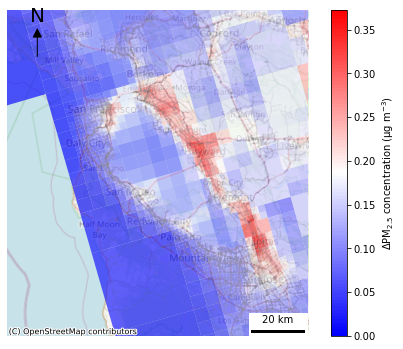

plot_concentrations ...


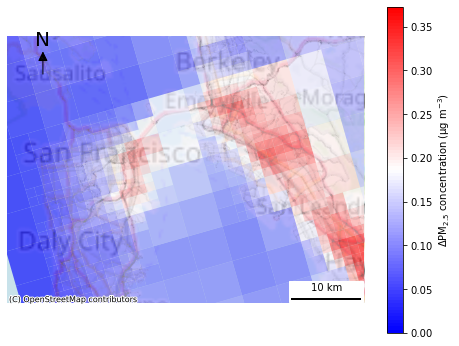

In [13]:
plot_concentrations(resultsISRM,'TotalPM25', scenario, scenario2, emissionType, proj_string, detail_net, 
#                     vmin = -0.08, vmax = 0.08
                   )        
plot_concentrations(resultsISRM,'TotalPM25', scenario, scenario2, emissionType, proj_string, detail_net, 
                    is_zoom= True,
#                     vmin = -0.08, vmax = 0.08
                   )  

In [4]:

######## Read and Simplify Haitam's emis file from BEAM

import pandas as pd

# emis_fp =  f'gs://beam-core-outputs/output/testing/job_67f72d0565516f2aaa14d443/sfbay-emissions--20240123--2018-Baseline__2025-04-10_03-11-41_sjh/ITERS/it.0/0.skimsEmissions.csv.gz'
emis_fp =  f'gs://beam-core-outputs/output/testing/job_67fc238a350864f86e0f2c0b/sfbay-emissions--20240123--2018-Baseline__2025-04-13_21-05-01_iek/ITERS/it.0/0.skimsEmissions.csv.gz'

emis= pd.read_csv(emis_fp,nrows=None)

print(len(emis))

pollutants = [
    "BC", "BCh", "BCm", "CH4", "CO", "CO2", "HC", "NH3",
    "NOx", "PM", "PM10", "PM2_5", "ROG", "SOx", "TOG"
]

for pol in pollutants:
    print(pol)
    emis[pol] = emis['emissions'].str.extract(fr'{pol}:([\d.eE+-]+)', expand=False).astype(float)


print("\n=== Raw Emissions Sums ===")
for p in pollutants:
    if p in emis.columns:
        total = emis[p].sum()/1000000*10*330
        print(f"{p:5s}: {total:,.2f}")
    else:
        print(f"{p:5s}: column not found")

group_keys = ["linkId", "vehicleTypeId"]

# verify columns exist
existing = [p for p in pollutants if p in emis.columns]
missing = set(pollutants) - set(existing)
if missing:
    print(f"Warning: these pollutants not found and will be skipped: {sorted(missing)}")

# perform the groupby+sum
emis_grouped = (
    emis
    .groupby(group_keys)[existing]
    .sum()
    .reset_index()
)
emis_grouped.to_csv('HaitamEmisGrouped_04132025.csv')
# preview

mask = emis_grouped['vehicleTypeId'].str.split('--').str[1].str[4:7].isin(['Car', 'Suv'])
filtered_df = emis_grouped[mask]

filtered_df_grouped = (
    filtered_df
    .groupby('linkId')[existing]
    .sum()
    .reset_index()
)

filtered_df_grouped.to_csv('HaitamEmisGroupedCarSuv_04132025.csv')


print("\n=== Raw Emissions Sums ===")
for p in pollutants:
    if p in filtered_df_grouped.columns:
        total = filtered_df_grouped[p].sum()/1000000*10*330
        print(f"{p:5s}: {total:,.2f}")
    else:
        print(f"{p:5s}: column not found")


138884600
BC
BCh
BCm
CH4
CO
CO2
HC
NH3
NOx
PM
PM10
PM2_5
ROG
SOx
TOG

=== Raw Emissions Sums ===
BC   : 85.82
BCh  : 104.42
BCm  : 100.74
CH4  : 684.54
CO   : 50,987.30
CO2  : 5,086,542.35
HC   : 15,744.22
NH3  : 401.89
NOx  : 16,390.65
PM   : 3,211.08
PM10 : 1,732.58
PM2_5: 483.92
ROG  : 16,321.99
SOx  : 50.25
TOG  : 16,931.01

=== Raw Emissions Sums ===
BC   : 4.77
BCh  : 4.77
BCm  : 4.77
CH4  : 333.56
CO   : 28,177.74
CO2  : 2,509,642.76
HC   : 10,416.05
NH3  : 196.73
NOx  : 2,105.06
PM   : 2,273.21
PM10 : 1,110.04
PM2_5: 198.18
ROG  : 10,843.26
SOx  : 25.54
TOG  : 11,102.42


In [5]:
emis.vehicleTypeId.value_counts()

2018LDAGas--2014CarConv--2015Chrysler200                 13128590
2018LDT2Gas--2016SuvConv--2015ToyotaHighlander2WD        11802790
2018LDT1Gas--2016SuvConv--2015ToyotaHighlander2WD         9838181
2018LDAGas--2016SuvConv--2015ToyotaHighlander2WD          9731562
2018LDAGas--2010CarHybrid--2015BuickRegaleAssist          6800570
                                                           ...   
2018LDT2Dsl--2011PickupConv--2015Chrysler200                   52
2018LDADsl--2012CarHybrid--2015BuickRegaleAssist               44
2018LDT2Dsl--2015SuvHybrid--2015InfinitiQX60HybridFWD          20
2018LDADsl--2017SuvConv--2015ToyotaHighlander2WD               16
2018LDADsl--2007CarHybrid--2015BuickRegaleAssist                8
Name: vehicleTypeId, Length: 344, dtype: int64

In [6]:
filtered_df.head()

,linkId,vehicleTypeId,BC,BCh,BCm,CH4,CO,CO2,HC,NH3,NOx,PM,PM10,PM2_5,ROG,SOx,TOG
1,10,2006LDAGas--2000SuvConv--2015ToyotaHighlander2WD,0.000529,0.000529,0.000529,0.039350,5.247919,472.383736,0.314124,0.067584,0.741004,0.181162,0.093381,0.019169,0.265250,0.004803,0.338772
2,10,2006LDAGas--2001CarConv--2015Chrysler200,0.000227,0.000227,0.000227,0.016864,2.249108,202.450172,0.134624,0.028965,0.317573,0.077641,0.040020,0.008215,0.113679,0.002058,0.145188
3,10,2006LDAGas--2002CarConv--2015Chrysler200,0.000151,0.000151,0.000151,0.011243,1.499405,134.966782,0.089750,0.019310,0.211715,0.051760,0.026680,0.005477,0.075786,0.001372,0.096792
4,10,2006LDAGas--2005CarConv--2016FordFusionAWD,0.000076,0.000076,0.000076,0.005621,0.749703,67.483391,0.044875,0.009655,0.105858,0.025880,0.013340,0.002738,0.037893,0.000686,0.048396
5,10,2006LDAGas--2005CarHybrid--2015BuickRegaleAssist,0.000151,0.000151,0.000151,0.011243,1.499405,134.966782,0.089750,0.019310,0.211715,0.051760,0.026680,0.005477,0.075786,0.001372,0.096792


In [7]:

# Postprocessing script Cristian:

#04102025

# tons_per_year_ROG 11795
# tons_per_year_NOx 11786
# tons_per_year_NH3 1668
# tons_per_year_SOx 195
# tons_per_year_PM2_5 321
# tons_per_year_CO2 19423911

#04132025

# tons_per_year_ROG          11,495
# tons_per_year_NOx          11,168
# tons_per_year_NH3           1,553
# tons_per_year_SOx            182
# tons_per_year_PM2_5          297
# tons_per_year_CO2     18,127,889

# BEAM Emis Haitam Car and Suv:
#04102025

# ROG  : 0.00
# NOx  : 55.44
# NH3  : 133.42
# SOx  : 0.00
# PM2_5: 17,447.87
# CO2  : 2,949.71

#04132025

# ROG  :       10,843
# NOx  :        2,105
# NH3  :          196
# SOx  :           25
# PM2_5:          198
# CO2  :    2,509,642

In [8]:

######## Process Haitam's simplified emis file from BEAM to build
# the format required by INMAP to calculate PM25 concentrations 


import geopandas as gpd
import pandas as pd

# 1. Read the GeoJSON file and your emissions CSV
gdf = gpd.read_file("isrm-beam--network-intersection.geojson")
emissions_df = pd.read_csv("HaitamEmisGroupedCarSuv.csv")

# 2. Merge the data on linkId
merged_df = pd.merge(
    emissions_df,
    gdf[['linkId','isrm_id', 'proportion']], 
    on='linkId',
    how='left'
)

# 3. List of pollutants
pollutants = [
    "BC", "BCh", "BCm", "CH4", "CO", "CO2", "HC", "NH3",
    "NOx", "PM", "PM10", "PM2_5", "ROG", "SOx", "TOG"
]

# 4. Multiply pollutant columns by the proportion
merged_df[pollutants] = merged_df[pollutants].mul(merged_df['proportion'], axis=0)

# 5. Sum pollutant emissions by isrm_id
grouped = merged_df.groupby('isrm_id', as_index=False).agg({col: 'sum' for col in pollutants})

# 6. Convert each pollutant from whatever your current unit is 
#    into TONS PER YEAR by applying the factor (10,330 / 1,000,000).
#    If you want to replace the original columns with their "tons per year" values:

#    Alternatively, if you prefer to keep original columns and create new ones, do this instead:
for col in pollutants:
    grouped['tons_per_year_'+col] = grouped[col] * (10 * 330 / 1_000_000)

# 7. Inspect a few rows
grouped.rename(columns={'isrm_id': 'ISRM'}, inplace=True)
grouped['ISRM'] = grouped['ISRM'].astype(int)
# 8. (Optional) Write results to a CSV
grouped.to_csv("HaitamTest_isrm_emissions_by_pollutant_04132025.csv", index=False)
print(grouped.head())

print("\n=== Raw Emissions Sums ===")
for p in pollutants:
    if p in grouped.columns:
        total = grouped['tons_per_year_'+p].sum()
        print(f"{p:5s}: {total:,.2f}")
    else:
        print(f"{p:5s}: column not found")


Empty DataFrame
Columns: [ISRM, BC, BCh, BCm, CH4, CO, CO2, HC, NH3, NOx, PM, PM10, PM2_5, ROG, SOx, TOG, tons_per_year_BC, tons_per_year_BCh, tons_per_year_BCm, tons_per_year_CH4, tons_per_year_CO, tons_per_year_CO2, tons_per_year_HC, tons_per_year_NH3, tons_per_year_NOx, tons_per_year_PM, tons_per_year_PM10, tons_per_year_PM2_5, tons_per_year_ROG, tons_per_year_SOx, tons_per_year_TOG]
Index: []

[0 rows x 31 columns]

=== Raw Emissions Sums ===
BC   : 0.00
BCh  : 0.00
BCm  : 0.00
CH4  : 0.00
CO   : 0.00
CO2  : 0.00
HC   : 0.00
NH3  : 0.00
NOx  : 0.00
PM   : 0.00
PM10 : 0.00
PM2_5: 0.00
ROG  : 0.00
SOx  : 0.00
TOG  : 0.00


In [9]:
emis_fp =  f'gs://beam-core-outputs/output/testing/job_67f72d0565516f2aaa14d443/sfbay-emissions--20240123--2018-Baseline__2025-04-10_03-11-41_sjh/ITERS/it.0/0.skimsEmissions.csv.gz'

emis= pd.read_csv(emis_fp,nrows=1000000)



In [10]:
emis[(emis['emissionsProcess']=='RUNEX') &(emis['vehicleTypeId'].str.contains('1993LDADsl'))][['emissionsProcess','SOx','PM2_5','vehicleTypeId']]

,emissionsProcess,SOx,PM2_5,vehicleTypeId
593,RUNEX,0.0,0.019982,1993LDADsl--Car--2015Chrysler200
2433,RUNEX,0.0,0.028420,1993LDADsl--Suv--2015ToyotaHighlander2WD
7905,RUNEX,0.0,0.027245,1993LDADsl--Car--2015Chrysler200
8165,RUNEX,0.0,0.002750,1993LDADsl--Suv--2015ToyotaHighlander2WD
18185,RUNEX,0.0,0.016856,1993LDADsl--Car--2022KiaOptima
...,...,...,...,...
941161,RUNEX,0.0,0.005829,1993LDADsl--Suv--2018ToyotaHighlander2WD
943493,RUNEX,0.0,0.139573,1993LDADsl--Car--2015Chrysler200
961141,RUNEX,0.0,0.084256,1993LDADsl--Car--2015Chrysler200
969208,RUNEX,0.0,0.019966,1993LDADsl--Car--2015Chrysler200


In [11]:
emis.keys()

Index(['hour', 'linkId', 'tazId', 'vehicleTypeId', 'emissionsProcess', 'BC',
       'BCh', 'BCm', 'CH4', 'CO', 'CO2', 'HC', 'NH3', 'NOx', 'PM', 'PM10',
       'PM2_5', 'ROG', 'SOx', 'TOG', 'travelTimeInSecond', 'energyInJoule',
       'parkingDurationInSecond', 'observations', 'iterations'],
      dtype='object')

In [12]:
emis['vehicleTypeId'].value_counts()

2018LDAGas--Car--2015Chrysler200                    70627
2006LDT2Gas--Minvan--2016ToyotaSienna2WD            54667
2018LDT2Gas--Suv--2015ToyotaHighlander2WD           52128
2018LDAGas--Suv--2015ToyotaHighlander2WD            47003
2006LDAGas--Car--2015Chrysler200                    43004
                                                    ...  
2018LDT2Dsl--Truck--2019ChevroletSilveradoC152WD        1
2018MDVDsl--Minvan--2017ToyotaSienna2WD                 1
2018MDVDsl--Suv--2021ToyotaHighlander2WD                1
1993LDAGas--Car--2023KiaOptima                          1
2018MDVDsl--Suv--2015InfinitiQX60HybridFWD              1
Name: vehicleTypeId, Length: 579, dtype: int64